In [1]:
!pip install yfinance

In [2]:
%pip install lxml
%pip install plotly

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   --------------- ------------------------ 1.6/4.0 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------  3.9/4.0 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.6 MB 10.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.6 MB 11.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 11.3 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   

In [3]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '1990-01-01'
end_date = '2024-08-1'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date, group_by=ticker, auto_adjust=False)[ticker]

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200
2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000
2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100
2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600
2024-07-31,185.050003,187.940002,184.460007,186.979996,186.979996,41667300


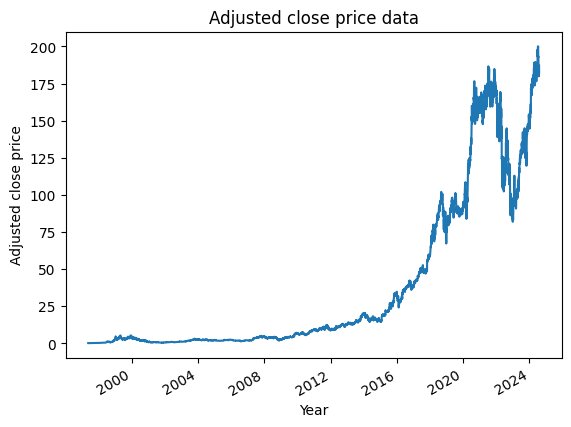

In [4]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data
data['Adj Close'].plot()
plt.xlabel('Year')
plt.ylabel('Adjusted close price')
plt.title('Adjusted close price data')
plt.show()

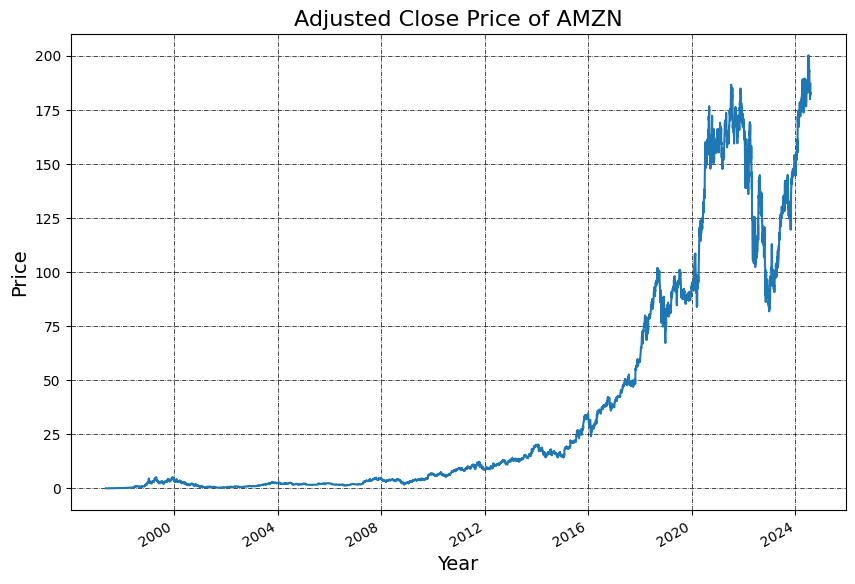

In [5]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))


# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)


# Define the labels for the x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)


# Show the plot
plt.show()

In [7]:
# How to get stock market data for different geographies?

# Set the start and end date
start_date = '1990-01-01'
end_date = '2024-08-1'

# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker,
                               start_date,
                               end_date, auto_adjust=False)['Adj Close']

# Print first 5 rows of the data
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,WMT
Date,,,,
2024-07-25,216.477615,186.337631,415.216553,69.308266
2024-07-26,216.945435,186.114395,422.034271,69.070709
2024-07-29,217.224121,185.871750,423.483154,68.912338
2024-07-30,217.781509,185.425262,419.702179,68.486702
2024-07-31,221.046234,186.492935,415.166931,67.942291


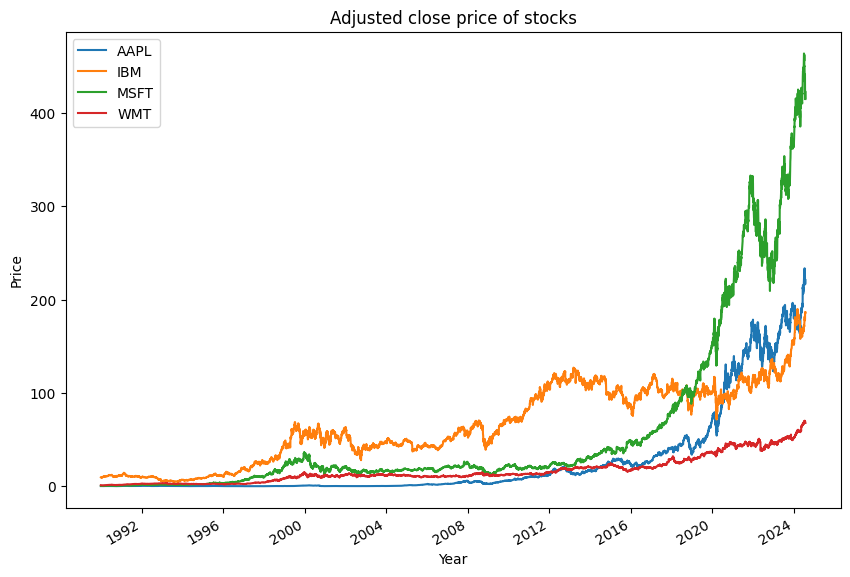

In [8]:
data.plot(figsize=(10, 7))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Adjusted close price of stocks')

# Show the plot
plt.show()

In [9]:
# Real-life example of stock market data fetching and analysis in Python ?
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [10]:
# Get the data for these tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),'2021-1-1','2024-08-1', auto_adjust=True)['Close']
print(data.head())

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-1-1 -> 2024-08-1)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Ticker               A        AAPL       ABBV        ABNB         ABT  \
Date                                                                    
2021-01-04  115.095329  126.239708  87.365028  139.149994  100.130592   
2021-01-05  116.036369  127.800484  88.268433  148.300003  101.369499   
2021-01-06  119.218346  123.498528  87.505936  142.770004  101.158417   
2021-01-07  122.390648  127.712692  88.442490  151.270004  102.140381   
2021-01-08  123.263763  128.815002  88.906616  149.770004  102.424866   

Ticker           ACGL         ACN        ADBE         ADI        ADM  ...  \
Date                                                                  ...   
2021-01-04  33.186359  239.904236  485.339996  134.812393  44.124958  ...   
2021-01-05  33.319485  241.270020  485.690002  137.222076  44.983223  ...   
2021-01-06  34.783871  243.907928  466.309998  137.840637  46.805904  ...   
2021-01-07  34.460564  246.209213  477.739990  143.666306  46.390041  ...   
2021-01-08  34.650742  247

In [11]:
intraday_data = yf.download(tickers="MSFT",
                            period="5d",
                            interval="1m",
                            auto_adjust=True, group_by='ticker')["MSFT"]
intraday_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Datetime,,,,,
2025-07-23 13:30:00+00:00,506.500000,506.750092,503.134888,503.260010,610565
2025-07-23 13:31:00+00:00,503.160004,503.593994,502.500000,502.679993,94798
2025-07-23 13:32:00+00:00,502.679993,503.299988,502.250000,503.049591,90249
2025-07-23 13:33:00+00:00,503.046112,503.970001,503.046112,503.320007,64563
2025-07-23 13:34:00+00:00,503.390015,503.700012,503.140015,503.700012,61184


In [14]:
# Resample stock data
# Convert 1-minute data to 1-hour data or resample stock data
# Use correct column names for MultiIndex columns

# 10T for 10 minutes,
# D for 1 day and
# M for 1 month

# Define the resampling logic for MultiIndex columns
ohlcv_dict_multi = {
    ('Open', 'MSFT'): 'first',
    ('High', 'MSFT'): 'max',
    ('Low', 'MSFT'): 'min',
    ('Close', 'MSFT'): 'last',
    ('Volume', 'MSFT'): 'sum'
}

# Resample the data
intraday_data_10 = intraday_data.resample('10T').agg(ohlcv_dict_multi)
intraday_data_10.head()

C:\Users\comp\AppData\Local\Temp\ipykernel_11172\468490886.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  intraday_data_10 = intraday_data.resample('10T').agg(ohlcv_dict_multi)


Price,Open,High,Low,Close,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Datetime,,,,,
2025-07-23 13:30:00+00:00,506.500000,506.750092,502.250000,503.665009,1217887
2025-07-23 13:40:00+00:00,503.720001,503.996185,502.234985,502.665009,595663
2025-07-23 13:50:00+00:00,502.690002,503.369995,502.250000,503.160004,400559
2025-07-23 14:00:00+00:00,503.089996,503.089996,501.320007,501.625000,753029
2025-07-23 14:10:00+00:00,501.625000,502.250000,500.700012,502.250000,664168


In [15]:
# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

In [16]:
# fetch the latest price to book ratio and price to earnings ratio

# Get the latest price to book ratio
pb_ratio = msft.info['priceToBook']
print('Price to Book Ratio is: ', pb_ratio)
# Get the latest price to earnings ratio
pe_ratio = msft.info['trailingPE']
print('Price to Earnings Ratio is: ', pe_ratio)

Price to Book Ratio is:  11.837645
Price to Earnings Ratio is:  39.6726


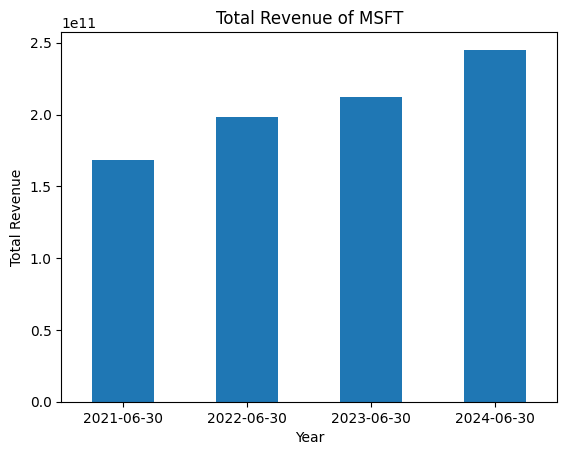

In [17]:
# Revenues

# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

# Get the financials data and sort the columns (dates) in ascending order
financials = msft.financials.sort_index(axis=1)

# Select the 'Total Revenue' row
total_revenue = financials.loc['Total Revenue']

# Plot the total revenue as a bar chart
total_revenue.plot.bar()

# Format the x-axis to show dates without time
plt.xticks(range(len(total_revenue.index)), total_revenue.index.strftime('%Y-%m-%d'), rotation=0)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue of MSFT')

# Show the plot
plt.show()

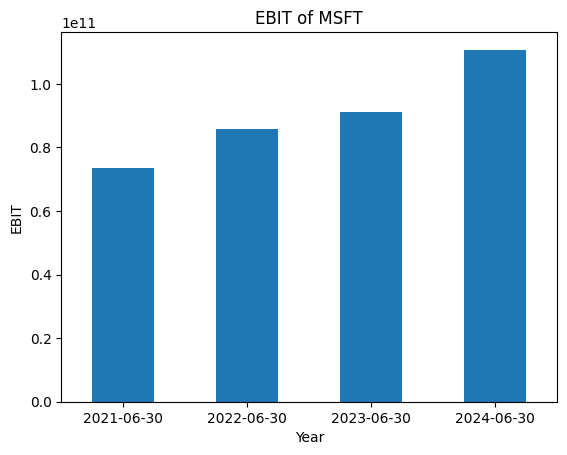

In [18]:
# Earnings Before Interest and Taxes (EBIT)
# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

# Get the financials data and sort the columns (dates) in ascending order
financials = msft.financials.sort_index(axis=1)

# Select the 'Total Revenue' row
EBIT = financials.loc['EBIT']

# Plot the total revenue as a bar chart
EBIT.plot.bar()

# Format the x-axis to show dates without time
plt.xticks(range(len(EBIT.index)), EBIT.index.strftime('%Y-%m-%d'), rotation=0)
plt.xlabel('Year')
plt.ylabel('EBIT')
plt.title('EBIT of MSFT')

# Show the plot
plt.show()

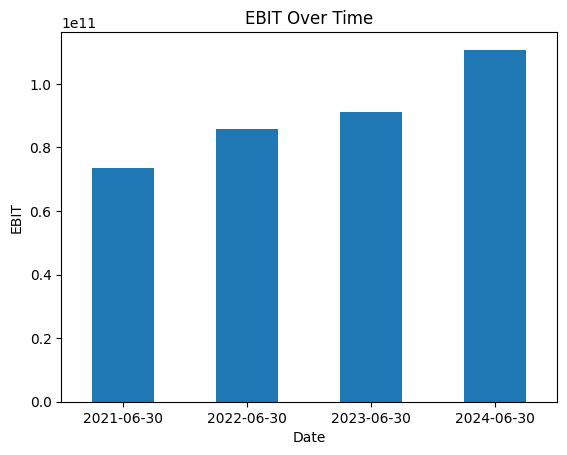

In [19]:
# Sorting the MSFT EBIT data
EBIT_sorted = EBIT.sort_values(ascending=True)

# Plotting the sorted EBIT
EBIT_sorted.plot.bar()
plt.xticks(range(len(EBIT_sorted.index)), EBIT_sorted.index.strftime('%Y-%m-%d'), rotation=0)
plt.xlabel('Date')
plt.ylabel('EBIT')
plt.title('EBIT Over Time')
plt.show()

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges', 'Write Off', 'Gain On Sale Of Security',
  

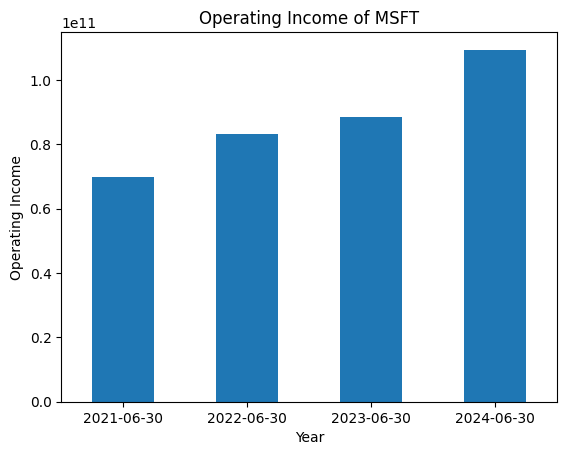

In [20]:
# Balance sheet, cash flows and other information

# Checking Operating income or EBIT (Earnings before interest and tax)
import yfinance as yf

# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

# Get the financials data
financials = msft.financials

# Display the available rows in the financials DataFrame
print(financials.index)
import matplotlib.pyplot as plt
import yfinance as yf

# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

# Get the financials data and sort the columns (dates) in ascending order
financials = msft.financials.sort_index(axis=1)

# Check if 'Operating Income' is available
if 'Operating Income' in financials.index:
    # Select the 'Operating Income' row
    operating_income = financials.loc['Operating Income']

    # Plot Operating Income as a bar chart (acting as a proxy for EBIT)
    operating_income.plot.bar()

    # Format the x-axis to show dates without time
    plt.xticks(range(len(operating_income.index)), operating_income.index.strftime('%Y-%m-%d'), rotation=0)
    plt.xlabel('Year')
    plt.ylabel('Operating Income')
    plt.title('Operating Income of MSFT')
    # Show the plot
    plt.show()
else:
    print("Operating Income data is not available.")

In [22]:
# If you already have a version of pyfolio on your system you can remove that using !pip uninstall pyfolio and then run the following code
!pip install pyfolio-reloaded==0.9.5

  Using cached pyfolio_reloaded-0.9.5-py3-none-any.whl.metadata (19 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached empyrical_reloaded-0.5.12-py3-none-any.whl.metadata (21 kB)
  Using cached bottleneck-1.5.0-cp313-cp313-win_amd64.whl.metadata (8.3 kB)
  Using cached peewee-3.17.3.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pyfolio_reloaded-0.9.5-py3-none-any.whl (6.3 MB)
Using cached empyrical_reloaded-0.5.12-py3-none-any.whl (33 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
c:\Users\comp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
c:\Users\comp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyfolio\plotting.py:666: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18.644%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2020-07-31
End date,2025-07-29
Total months,59
,Backtest
Annual return,18.644%
Cumulative returns,134.131%
Annual volatility,22.303%
Sharpe ratio,0.88
Calmar ratio,0.64
Stability,0.75
Max drawdown,-29.312%


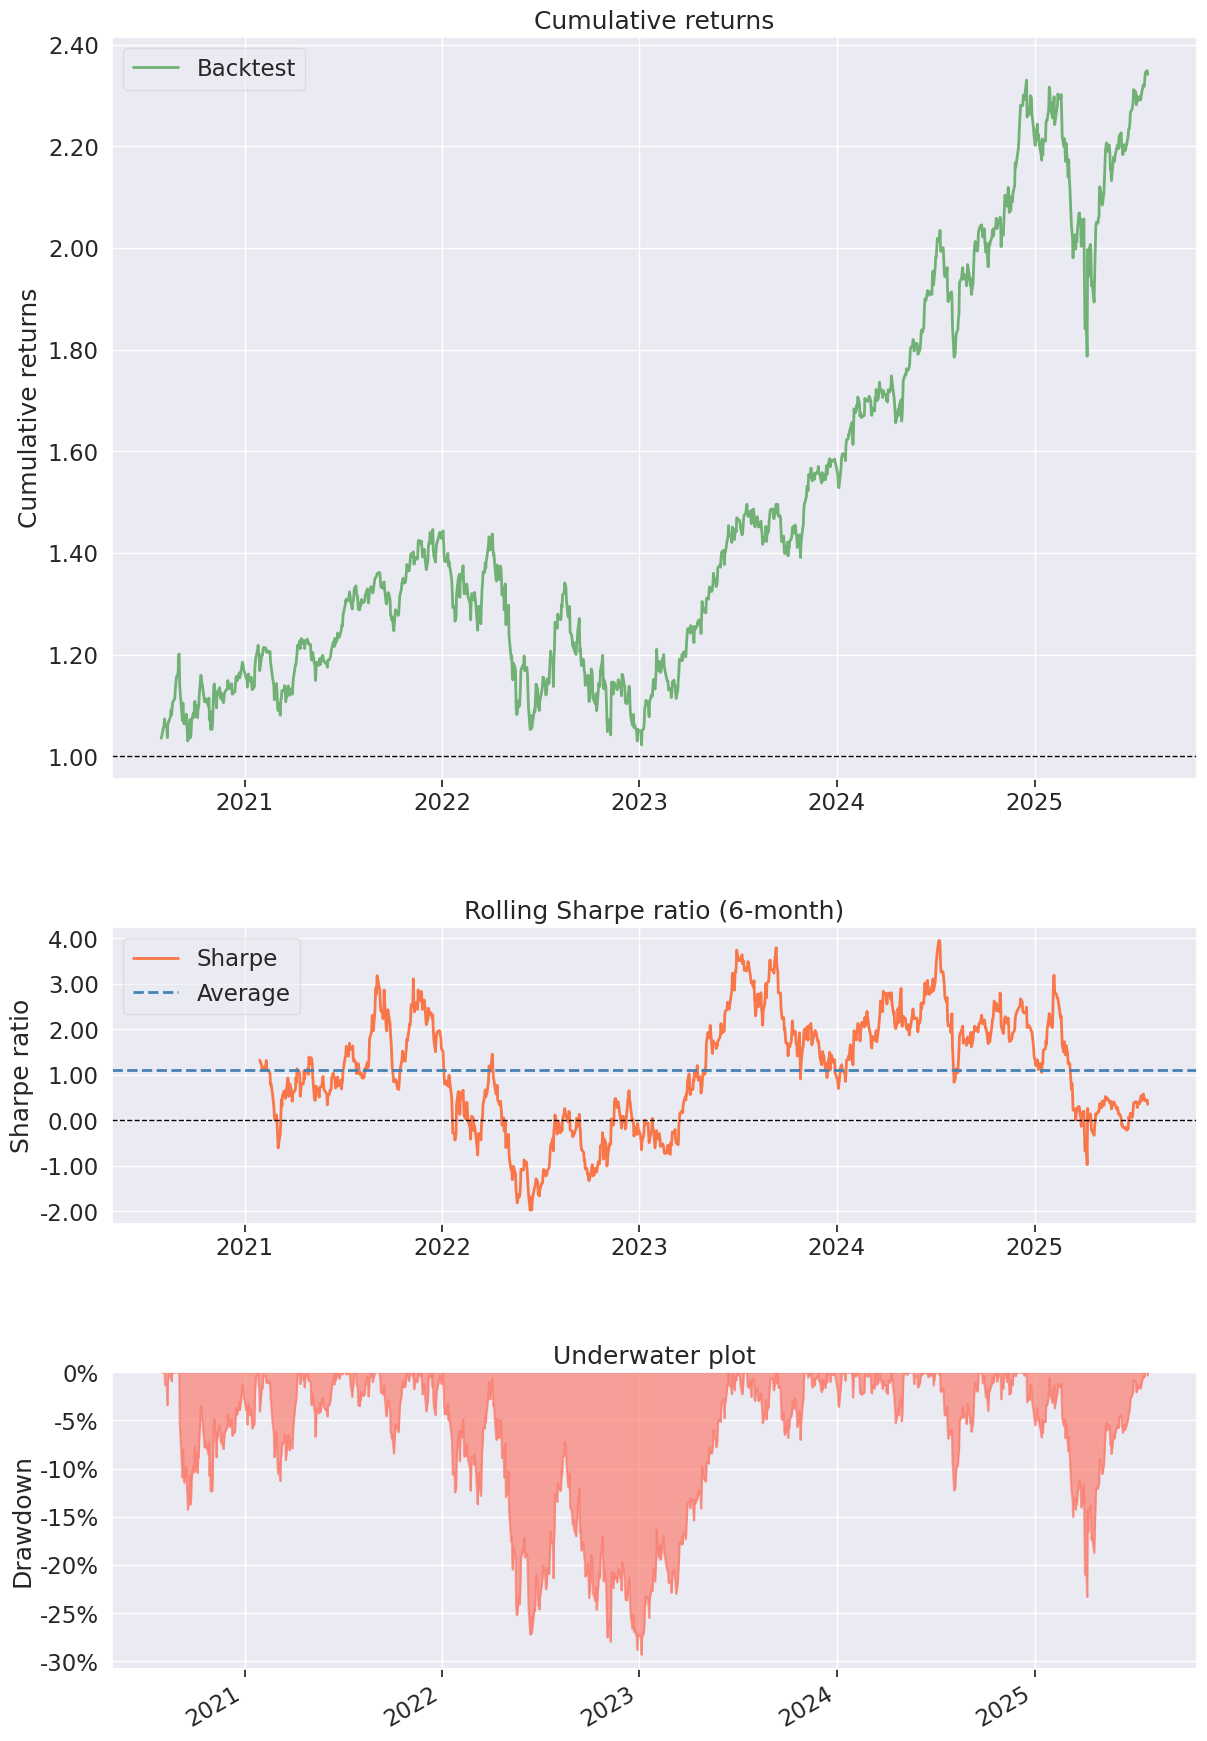

In [23]:

# Define the ticker list
tickers_list = ['AAPL', 'AMZN', 'MSFT', 'WMT']

# Import pandas and create a placeholder for the data
import pandas as pd
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
import yfinance as yf
for ticker in tickers_list:
     data[ticker] = yf.download(ticker, period='5y', auto_adjust=False)['Adj Close']

# Compute the returns of individual stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.
data = data.pct_change().dropna().mean(axis=1)

# Import Pyfolio
import pyfolio as pf

# Get the full tear sheet
pf.create_simple_tear_sheet(data)